# tips on drawing histograms: bin alignment vs labels

In [3]:
import pandas as pd, numpy as np, seaborn as sns
import os
# Remove the most annoying pandas warning
# A value is trying to be set on a copy of a slice from a DataFrame.
pd.options.mode.chained_assignment = None

data_dir = '../../data'
src_file = 'sample01.csv'
f = os.path.join(data_dir, src_file)

import sys
sys.path.insert(0, '../modules')
import handy as hd

In [3]:
df = pd.read_csv(f, sep = ';')
df.shape

(150179, 6)

In [4]:
# remember the original data under this variable
df0 = df.copy()

## example: 2d histogram

showing bin allignments: incorrect, and correct

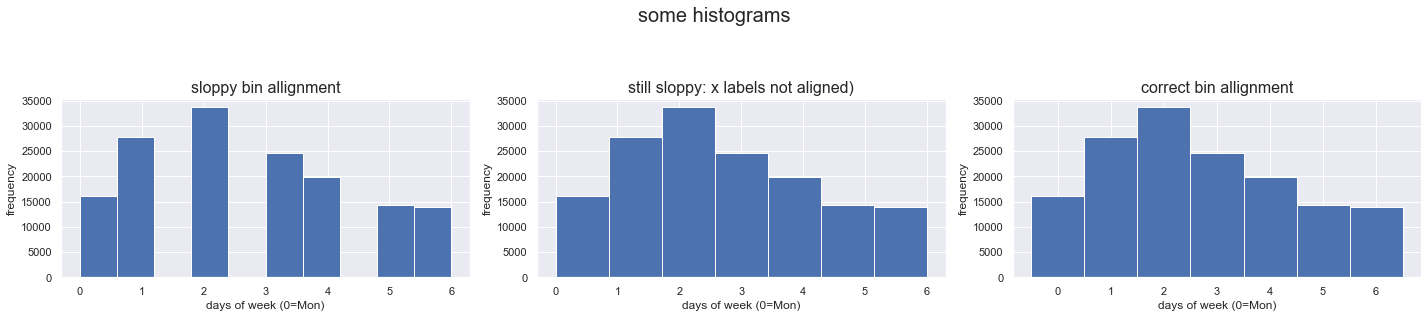

In [5]:
data = df
sns.set()
import matplotlib.pyplot as plt;
import matplotlib.colors as mcolors

fig, ax  = plt.subplots(1, 3, figsize=(20,4))
ax = ax.flatten()

fig.suptitle("some histograms", fontsize=20, y=1.1)

axis = ax[0]

h = axis.hist(x = data.weekday)

axis.set_xlabel('days of week (0=Mon)')
axis.set_ylabel('frequency')
axis.set_title("sloppy bin allignment", fontsize = 16)

axis = ax[1]

axis.hist(x = data.weekday, bins = 7)

axis.set_xlabel('days of week (0=Mon)')
axis.set_ylabel('frequency')
axis.set_title("still sloppy: x labels not aligned)", fontsize = 16)

axis = ax[2]

axis.hist(x = data.weekday, bins = (np.arange(7 + 1)) - 0.5)

axis.set_xlabel('days of week (0=Mon)')
axis.set_ylabel('frequency')
axis.set_title("correct bin allignment", fontsize = 16)


plt.tight_layout()


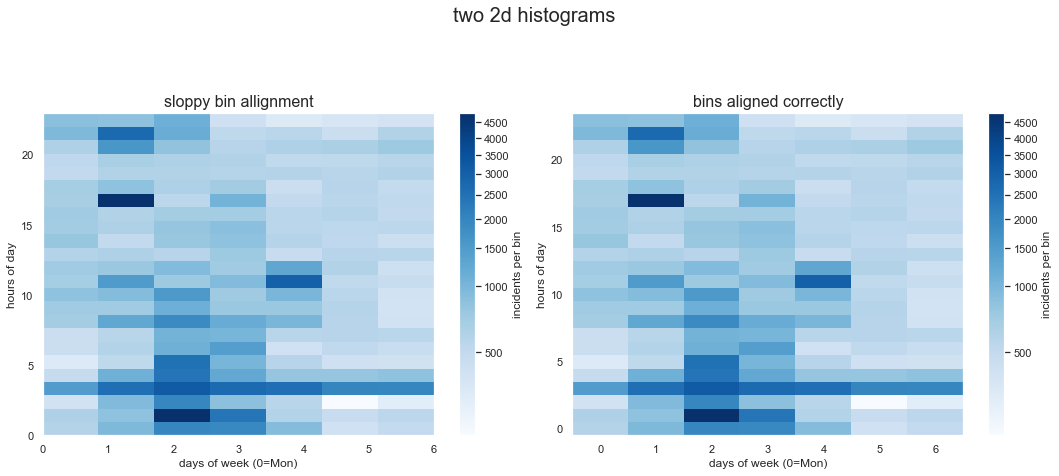

In [6]:
data = df

import matplotlib.pyplot as plt;
import matplotlib.colors as mcolors

fig, ax  = plt.subplots(1, 2, figsize=(15,6))

fig.suptitle("two 2d histograms", fontsize=20, y=1.1)

ax1 = ax[0]
# gammas = [0.8, 0.5, 0.3]
gamma = 0.4

h = ax1.hist2d(x = data.weekday, 
               y = data.hour, 
               bins = [7, 24], 
               norm=mcolors.PowerNorm(gamma), 
               cmap='Blues')

cb = fig.colorbar(h[3], ax=ax1)
cb.set_label('incidents per bin')
ax1.set_xlabel('days of week (0=Mon)')
ax1.set_ylabel('hours of day')
ax1.set_title("sloppy bin allignment", fontsize = 16)

plt.tight_layout()

ax1 =ax[1]
xbins = np.arange(0, 7 + 1) - 0.5
ybins = np.arange(0, 24 + 1) - 0.5

h = ax1.hist2d(x = data.weekday, 
               y = data.hour, 
               bins = [xbins, ybins], 
               norm=mcolors.PowerNorm(gamma), 
               cmap='Blues')
              #vmax = 100 )
cb = fig.colorbar(h[3], ax=ax1)
cb.set_label('incidents per bin')
ax1.set_xlabel('days of week (0=Mon)')
ax1.set_ylabel('hours of day')
ax1.set_title("bins aligned correctly", fontsize = 16)

plt.tight_layout()


# same problem with Seaborn (v 0.11) displot or joinplot, type hist

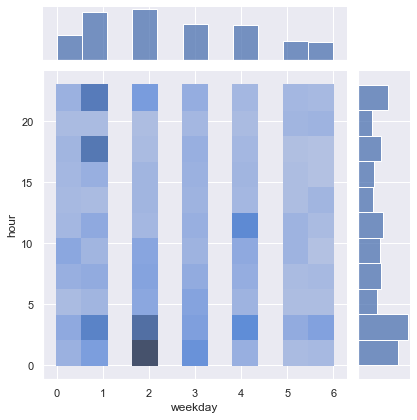

In [7]:
# bad 
sns.jointplot(x="weekday", y="hour", data=df.sample(1000), kind='hist', ax = ax[0])


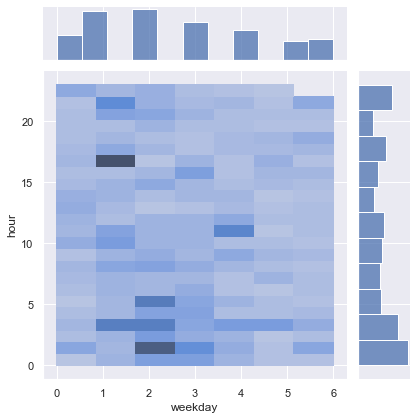

In [8]:
# still bad
sns.jointplot(x="weekday", y="hour", data=df.sample(1000), kind='hist',bins = [7, 24])

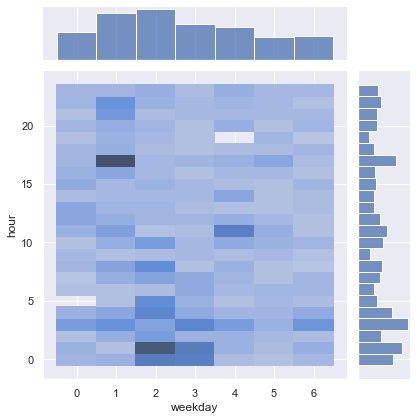

In [9]:
#good
bins = (np.arange(7 + 1)-0.5, np.arange(24 + 1) - 0.5)
sns.jointplot(x="weekday", y="hour", data=df.sample(1000), kind='hist',bins = bins)

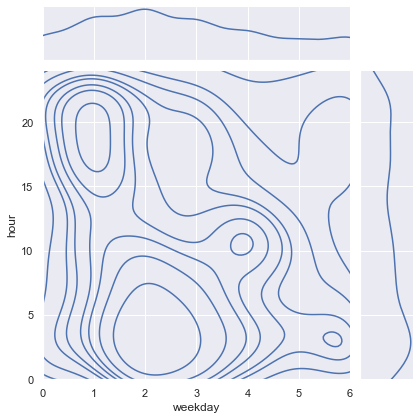

In [10]:
# but the problem is gone, if displot type is other than kde
sns.jointplot(x="weekday", y="hour", data=df.sample(1000), kind='kde', xlim=(0,6), ylim=(0,24))

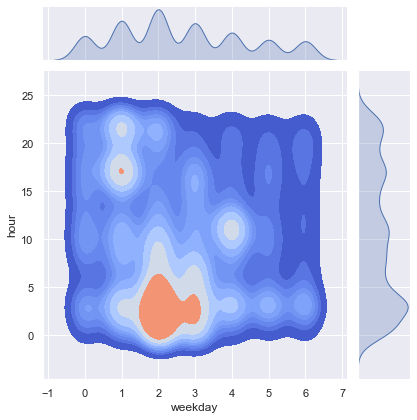

In [11]:
sns.jointplot(x="weekday", y="hour", cmap = 'coolwarm', data=df.sample(10000), kind='kde',  fill=True)

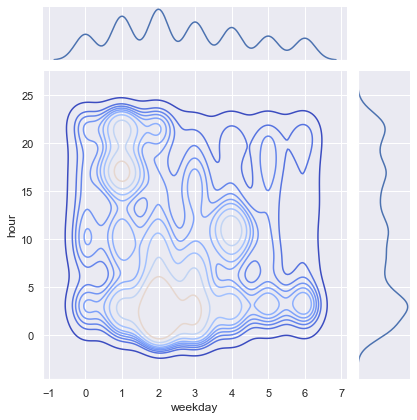

In [12]:
# same, with contour only
sns.jointplot(x="weekday", y="hour", cmap = 'coolwarm', data=df.sample(10000), kind='kde')

# more problems with bin allignment

In [13]:
# I will now demonstrate how bad bins lead to bad conclusions

In [18]:
# store previous df under separate variable
df0 = df


In [19]:
data_dir = '../../data'
src_file = 'sample02.csv'
f = os.path.join(data_dir, src_file)
df = pd.read_csv(f, sep = ';')

In [20]:
df['created'] = pd.to_datetime(df['created'], format = hd.format_dash, errors = 'coerce')
df['resolved'] = pd.to_datetime(df['resolved'], format = hd.format_dash, errors = 'coerce')
df = hd.augment_columns(df)

# remember this augmented data set
df1 = df

In [21]:
minweek, maxweek = df.week_nr.min(), df.week_nr.max()
minweek, maxweek

(0, 153)

In [22]:
data1 = df[(df.week_nr == maxweek -1) & (df.category == 'Alarm')].weekhour
data2 = df[(df.week_nr == maxweek -1)].weekhour

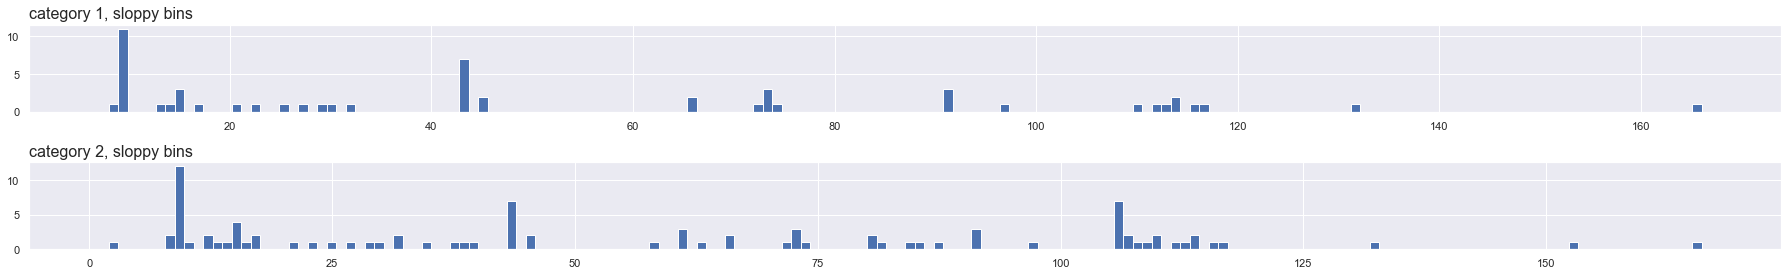

In [23]:
#INCORRECT

slots = 24 * 7
bins_sloppy = slots
           
fig, ax = plt.subplots(2,1, figsize = (25,4))

axis = ax[0]
w1 = axis.hist(x= data1, bins = bins_sloppy)
axis.set_title('category 1, sloppy bins', loc = 'left', fontsize = 16)

axis = ax[1]
w2 = axis.hist(x= data2, bins = bins_sloppy)
axis.set_title('category 2, sloppy bins', loc = 'left', fontsize = 16)

plt.tight_layout()

In [24]:
# the visualization above is wrong. Bars are mislined, due to sloppy bins definition

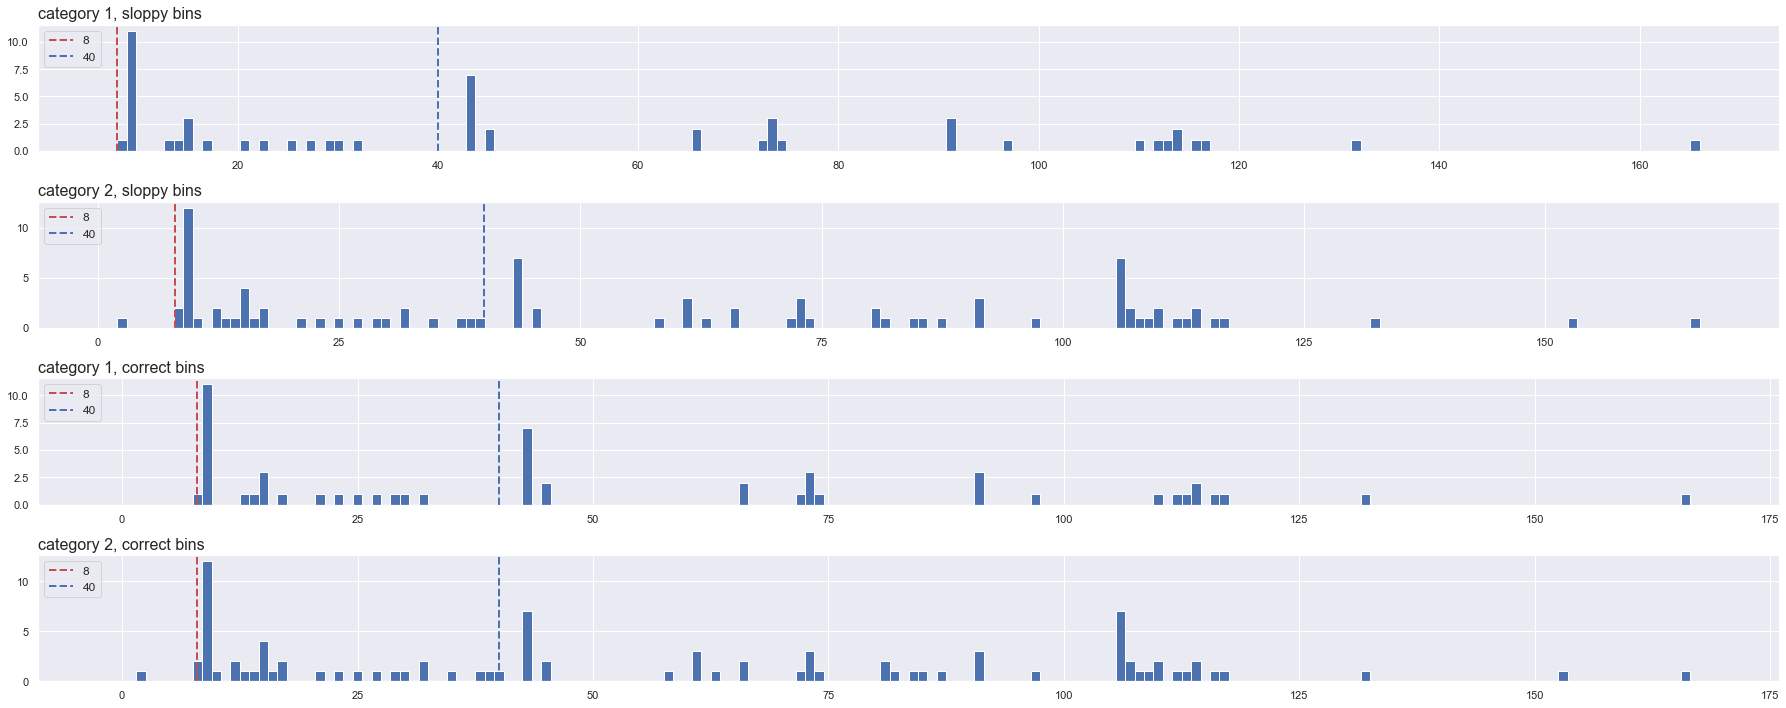

In [25]:
#CORRECT

def my_title_markers(axis, title, marker1, marker2):
    axis.set_title(title, loc = 'left', fontsize = 16)
    axis.axvline(x=marker1, color='r', linestyle='dashed', linewidth=2, label = str(marker1))
    axis.axvline(x=marker2, color='b', linestyle='dashed', linewidth=2, label = str(marker2))
    axis.legend(loc = 'upper left', fontsize = '12')

    
slots = 24 * 7
sloppy_bins = slots
bins = np.arange(slots + 1) - 0.5

fig, ax = plt.subplots(4,1, figsize = (25,10))
marker1, marker2 = 8, 40

axis = ax[0]
axis.hist(x= data1, bins = sloppy_bins)
my_title_markers(axis, 'category 1, sloppy bins', marker1, marker2)

axis = ax[1]
axis.hist(x= data2, bins = sloppy_bins)
my_title_markers(axis, 'category 2, sloppy bins', marker1, marker2)

axis = ax[2]
w1 = axis.hist(x= data1, bins = bins)
my_title_markers(axis, 'category 1, correct bins', marker1, marker2)

axis = ax[3]
w2 = axis.hist(x= data2, bins = bins)
my_title_markers(axis, 'category 2, correct bins', marker1, marker2)

plt.tight_layout()

# Problems with binning and rounding days and weeks (pd.Timestamp)

The below is a long version. The compact version has been summarized in handy-showcase workbook.

In [4]:
data_dir = '../../data'
src_file = 'sample01.csv'
f = os.path.join(data_dir, src_file)
df = pd.read_csv(f, sep = ';')
df['created'] = pd.to_datetime(df['created'], format = hd.format_dash, errors = 'coerce')
df['resolved'] = pd.to_datetime(df['resolved'], format = hd.format_dash, errors = 'coerce')
df = hd.augment_columns(df)


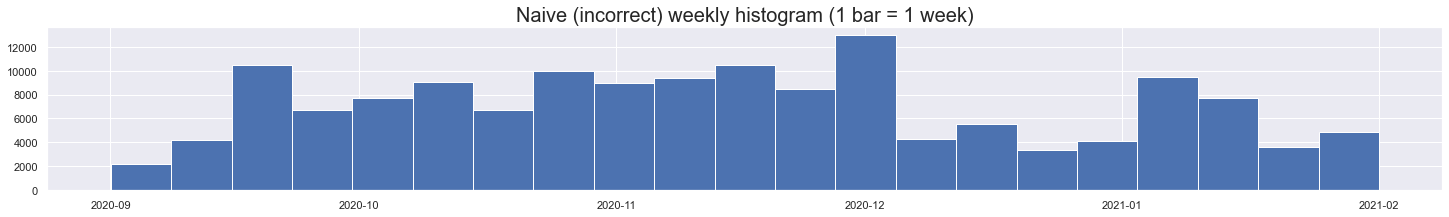

Basic statistics:

Total records:	150179
start:	2020-09-01 00:37:07	Tuesday
end:	2021-01-31 23:59:16	Sunday
weeks: 21.7	records per week:6916.1,	 weekly min:2219,	 weekly max:12971
days: 152	records per day:988.0


In [6]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set()

start, end = df.created.min(), df.created.max()
days = (end - start).days
weeks = days / 7

fig, ax = plt.subplots(1,1, figsize = (25,3))
data = df[(df.created > start) & (df.created < end)].created

axis = ax
w = axis.hist(x= data, bins = int(weeks))
axis.set_title('Naive (incorrect) weekly histogram (1 bar = 1 week)', fontsize = 20)

plt.show()
print('Basic statistics:\n')
print('Total records:\t{}'.format(len(df)))
print('start:\t{}\t{}\nend:\t{}\t{}'.format(start, start.day_name(), end, end.day_name()))
print('weeks: {:.1f}\trecords per week:{:.1f},\t weekly min:{},\t weekly max:{}'.format( weeks, len(df) / weeks, int(min(w[0])), int(max(w[0]))))
print('days: {}\trecords per day:{:.1f}'.format(days, len(df) / days))


In [7]:
# return Monday 00:00:00 before given moment
def monday_before(now):
    monday_before = now - pd.Timedelta(now.weekday(), 'days')
    # Monday 00:00:00
    return pd.Timestamp(monday_before.date())

# return Monday 00:00:00 after given moment 
def monday_after(now):
    # trick: compute Monday before 1 week from now... it's the same.
    return monday_before(now + pd.Timedelta(7, 'days'))

# use this to have full week span, spanning tne entire period
# returns: Monday before, Monday after, number of weeks between
def outer_week_boundaries(series):
    start, end =  monday_before(series.min()), monday_after(series.max())
    return start, end, (end - start).days // 7

def inner_week_boundaries(series):
    start, end = monday_after(series.min()), monday_before(series.max())
    return start, end, (end - start).days // 7  

# exact number of days, including fraction of day (float)
def fractional_days(data_start, data_end):
    delta = data_end - data_start
    return delta.days + delta.seconds / (60 * 60 * 24)

# number of full 24-hour periods
def inner_days(data_start, data_end):
    return (data_end - data_start).days 

# number of days between midnight-before-first-record and midnight-after-last-record
def outer_days(data_start, data_end):
    return (data_end.date() - data_start.date()).days + 1

def weekly_bin_edges(start, howmany):
    # add 1 for we count bin edges rather than bins
    WEEK = pd.Timedelta(7, 'days')
    return [outer_start + i * WEEK for i in np.arange(howmany + 1)]

def daily_bin_edges(start, howmany):
    # add 1 for we count bin edges rather than bins
    DAY = pd.Timedelta(1, 'days')
    return [data_start.date() + i * DAY for i in np.arange(howmany + 1)]

        
    

In [8]:
# weekly bins


#s = weekly_statistics()
outer_start, outer_end, outer_weeks = outer_week_boundaries(df.created)
inner_start, inner_end, inner_weeks = inner_week_boundaries(df.created)
data_start, data_end = df.created.min(), df.created.max()
weekly_bins = weekly_bin_edges(outer_start, outer_weeks)

days = fractional_days(data_start, data_end)
outer_days = outer_days(data_start, data_end)
daily_bins = daily_bin_edges(data_start, outer_days)
weeks = days / 7

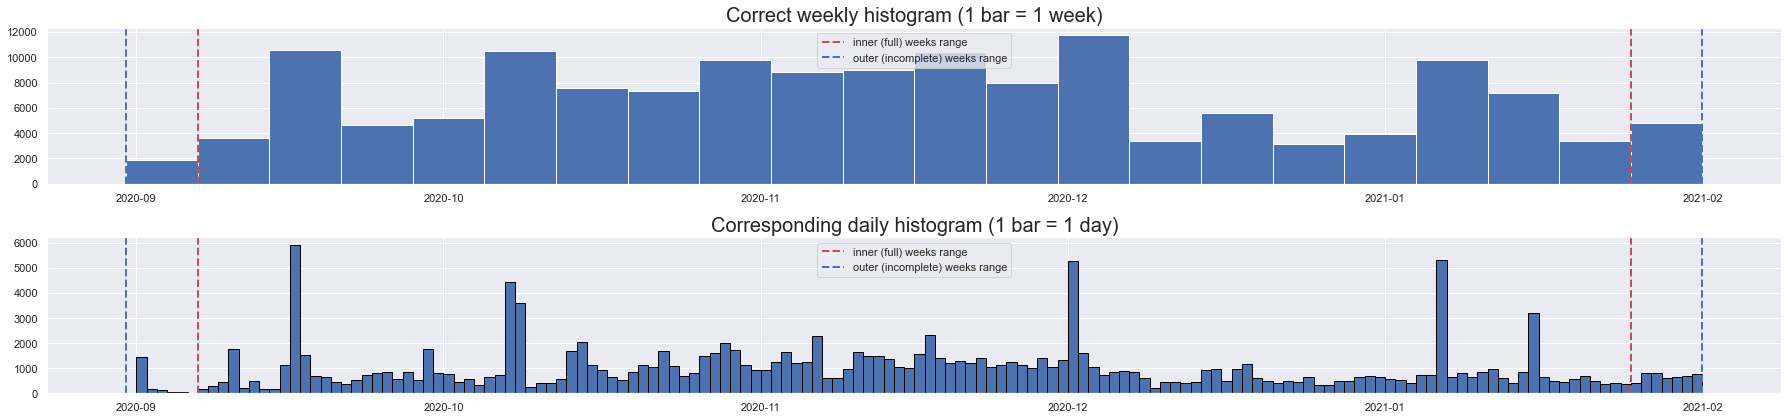

Basic statistics:

Total records:	150179
Histogram range (outer weeks):22
start:	2020-08-31 00:00:00	Monday
end:	2021-02-01 00:00:00	Monday
Data range:
start:	2020-09-01 00:37:07	Tuesday
end:	2021-01-31 23:59:16	Sunday
Full weeks (inner weeks):20
start:	2020-09-07 00:00:00	Monday
end:	2021-01-25 00:00:00	Monday
Data stats:
weeks: 21.9	records per week:6872.1,	 weekly min:3139,	 weekly max:11752
days: 153.0	records per day:981.7,	 daily min:26,	 daily max:5925
Note: The minima do not take into account the marginal (uncomplete) weeks or days


In [9]:
def draw(axis, outer_start, outer_end, inner_start, inner_end):
    axis.axvline(x=inner_start, color='r', linestyle='dashed', linewidth=2, label = 'inner (full) weeks range')
    axis.axvline(x=outer_start, color='b', linestyle='dashed', linewidth=2, label = 'outer (incomplete) weeks range')
    axis.axvline(x=inner_end, color='r', linestyle='dashed', linewidth=2)
    axis.axvline(x=outer_end, color='b', linestyle='dashed', linewidth=2)
    axis.legend()
   
fig, ax = plt.subplots(2,1, figsize = (25,6))
data = df.created

axis = ax[0]
w = axis.hist(x= data, bins = weekly_bins)
draw(axis, outer_start, outer_end, inner_start, inner_end)
axis.set_title('Correct weekly histogram (1 bar = 1 week)', fontsize = 20)
    
week_values = w[0]
fullweek_values = week_values[1:-1]

axis = ax[1]
draw(axis, outer_start, outer_end, inner_start, inner_end)
d = axis.hist(x= data, bins = daily_bins, edgecolor = 'black')
axis.set_title('Corresponding daily histogram (1 bar = 1 day)', fontsize = 20)

day_values = d[0]
fullday_values = day_values[1:-1]

plt.tight_layout()
plt.show()


print('Basic statistics:\n')
print('Total records:\t{}'.format(len(df)))
print('Histogram range (outer weeks):{:.0f}'.format(outer_weeks))
start, end = outer_start, outer_end
print('start:\t{}\t{}\nend:\t{}\t{}'.format(start, start.day_name(), end, end.day_name()))
print('Data range:')
start, end = data_start, data_end
print('start:\t{}\t{}\nend:\t{}\t{}'.format(start, start.day_name(), end, end.day_name()))
print('Full weeks (inner weeks):{:.0f}'.format(inner_weeks))
start, end = inner_start, inner_end
print('start:\t{}\t{}\nend:\t{}\t{}'.format(start, start.day_name(), end, end.day_name()))
print('Data stats:')
print('weeks: {:.1f}\trecords per week:{:.1f},\t weekly min:{},\t weekly max:{}'.\
      format( weeks, len(df) / weeks, int(min(fullweek_values)), int(max(week_values))))
print('days: {:.1f}\trecords per day:{:.1f},\t daily min:{},\t daily max:{}'.\
      format(days, len(df) / days, int(min(fullday_values)), int(max(day_values))))
print('Note: The minima do not take into account the marginal (uncomplete) weeks or days')
